In [1]:
#importing the libraries:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#pip install keras
#import keras
#from keras.models import Sequential
#from keras.layers import Dense

#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

from scipy import stats
from scipy.stats import norm

In [2]:
#creating the base path
path = "/Users/rachana/Documents/projects/udacity_project/data/"

In [3]:
#getting the dataset- ''''there are three seperate csv files''''


listing = pd.read_csv(path + 'listings.csv')
calender = pd.read_csv(path + 'calendar.csv')
reviews = pd.read_csv(path+ 'reviews.csv')

In [4]:
print ("listing has {} no. of rows and {} no. of columns".format(listing.shape[0], listing.shape[1] ))
print ("calender has {} no. of rows and {} no. of columns".format(calender.shape[0], calender.shape[1] ))
print ("reviews has {} no. of rows and {} no. of columns".format(reviews.shape[0], reviews.shape[1] ))

listing has 3818 no. of rows and 92 no. of columns
calender has 1393570 no. of rows and 4 no. of columns
reviews has 84849 no. of rows and 6 no. of columns


## LISTING DATA:
1. MISSING VALUES
2. PRICE BREAKUP
3. price distrbution wrt to property type
4. most popular neighbourhood in terms of price


In [5]:
# now lets look at the listing...
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
# inorder to perform merge we will have to rename id to listing_id in listing df:
listing.rename(columns={'id':'listing_id'}, inplace=True)

In [6]:
#Inorder to understand the listing data , lets gat a list of all the 92 column names.
list(listing.columns.values) 

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

## MISSING VALUES IN LISTING DATA

In [7]:
# lets take a look at the null values in the listing
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
# A LOOK AT THE COLUMNS WITHOUT MISSING DATA- 47. columns have no null data
no_nulls = set(listing.columns[listing.isnull().sum()==0])
len(no_nulls)

47

In [9]:
#columns with most missing values
most_missing_cols = set(listing.columns[listing.isnull().sum() > 0.75])
len(most_missing_cols)

45

<Figure size 14400x10800 with 0 Axes>

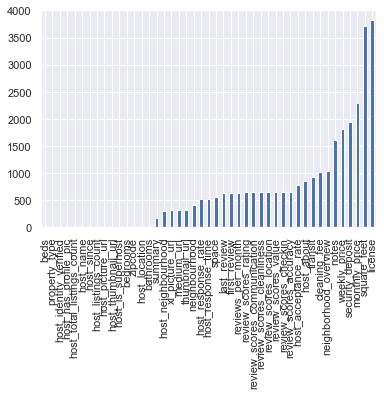

<Figure size 14400x10800 with 0 Axes>

In [13]:
#a look at columns with most missing values
missing = listing.isnull().sum()
missing = missing[missing > 0.75]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.figure(figsize=(200,150))

# Formating 'price' column:
1. 'Price' is the target variable, it has no null values... 
2. But it has a dolar sign and therefore it is represented as string object. Inorder to proceed further the '$' sign will have to be removed and dtype of 'price' coumn will be changed to float.

In [14]:

listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")

In [15]:
listing['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

## Price trends
lets take a look how the price of renting varies===
1. in terms of distribution
2. how the locality affects the price?
3. how property_type effects the price?
4. price trends over time?
5. price trends over the week days vs week ends?
5. price per bedroom? somehow normalise the price

<Figure size 2160x720 with 0 Axes>

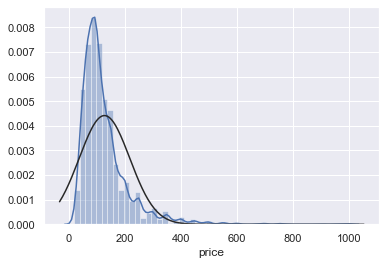

<Figure size 2160x720 with 0 Axes>

In [16]:
# Price distribution in listing data
sns.distplot(listing['price'], fit = norm)
plt.figure(figsize=(30,10))

In [17]:
listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

## Q1. which neighbourhood has most  no. of listings?

Text(0.5, 1.0, 'TOp 10 Neighbourhood with most no. of listing')

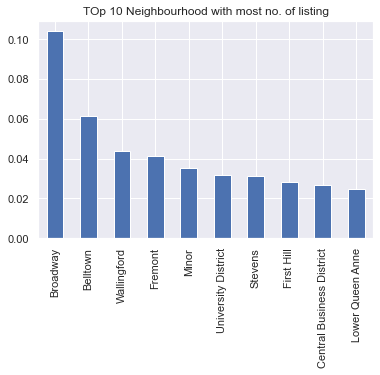

In [18]:
n=10
neighbourhood = listing.neighbourhood_cleansed.value_counts().head(n)
(neighbourhood/len(listing.neighbourhood_cleansed)).plot(kind="bar");
plt.title("TOp 10 Neighbourhood with most no. of listing")

## Q2 what are the most expensive neighbourhood in terms of price?

In [19]:
n = 10
price_neighbourhood = listing.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending = False).head(n)


Text(0.5, 1.0, 'Top ten Most expensive neighbourhood')

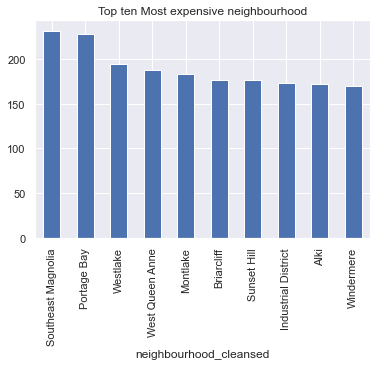

In [20]:
price_neighbourhood.plot(kind = 'bar')
plt.title('Top ten Most expensive neighbourhood')

## Q3 How does the property type impact listing price on a neighborhood basis??

In [21]:
#get the count of different types of property in listing:
listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [22]:

price_property_type = listing.groupby(['property_type']).mean()['price'].sort_values(ascending = False)


Text(0.5, 1.0, 'Most expensive property_type')

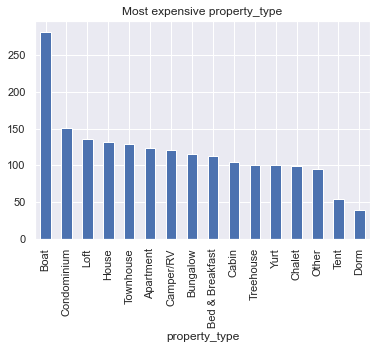

In [23]:
price_property_type.plot(kind = 'bar');
plt.title('Most expensive property_type')

In [ ]:
neighborhood_mean_df = pd.DataFrame(df.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
neighborhood_mean_df = neighborhood_mean_df.rename(columns = {'price': 'mean_price'})

neighborhood_std_df = pd.DataFrame(df.groupby('neighbourhood_cleansed').std()['price'].sort_values(ascending=False))
neighborhood_std_df = neighborhood_std_df.rename(columns = {'price': 'std_price'})

neighborhood_df = neighborhood_mean_df.merge(neighborhood_std_df, on='neighbourhood_cleansed')

top_10 = neighborhood_df.index[:10].tolist() # the subset of neighborhoods we'll analyze for question two

neighborhood_df.head(10)

In [ ]:
box_data = []

for neighbourhood in top_10:
    trace = go.Box(x = df.loc[df['neighbourhood_cleansed'] == neighbourhood].price.tolist(), name = neighbourhood)
    box_data.append(trace)

box_layout = go.Layout(xaxis = dict(title='Listing Price'))
box_fig = go.Figure(data=box_data, layout=box_layout)

box_fig.show()


In [ ]:
stacked_bar_df = pd.DataFrame(df.loc[df['neighbourhood_cleansed'].isin(top_10) ].groupby(['neighbourhood_cleansed', 'property_type']).count()['id']).reset_index()
property_type_list = stacked_bar_df.property_type.unique().tolist()

stacked_bar_data = []

for property_type in property_type_list:
        stacked_bar_trace = go.Bar(name = property_type, x= top_10, y =stacked_bar_df[stacked_bar_df['property_type']== property_type]['id'].tolist())
        stacked_bar_data.append(stacked_bar_trace)
        
stacked_bar_layout = go.Layout(title = 'Property Type Count in Top 10 Most Expensive Neighborhoods',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
stacked_bar_fig = go.Figure(data=stacked_bar_data, layout=stacked_bar_layout)

stacked_bar_fig.show()

In [ ]:
# create a heat map showing the mean prices for the two most common property types
property_types = ['House', 'Apartment'] 

# transform data to group it properly to for the heatmap visualization using plotly
heatmap_filtered_df = pd.DataFrame(df.loc[df['neighbourhood_cleansed'].isin(top_10) & df['property_type'].isin(property_types)].groupby(['neighbourhood_cleansed', 'property_type']).mean()['price']).reset_index()

heatmap_group = heatmap_filtered_df.groupby('neighbourhood_cleansed')
heatmap_df = pd.DataFrame(heatmap_group.apply(lambda x: x['price'].unique())) # creates a row for each neighborhood with an array of mean prices by property type

heatmap_df.columns = ['price']

heatmap_price= heatmap_df.price.tolist()

heatmap_index = heatmap_df.index.tolist()

heatmap_trace = go.Heatmap(
    z = heatmap_price,
    x = ['Apartment', 'House'],
    y = heatmap_index
)
heatmap_data = [heatmap_trace]


heatmap_layout = dict(title = 'Comparing Mean Listing Price for Neighborhood by Property Type',
              xaxis= dict(automargin = True),
              yaxis = dict(automargin = True)           
             )
heatmap_fig = go.Figure(data=heatmap_trace, layout = heatmap_layout)


heatmap_fig.show()


## who are the top 10 host in terms of listing posted on airbnb ?

In [24]:
#number of unique hosts
unique_host = listing['host_id'].unique()
print('Number of unique hosts in listing dataset:{}'.format(len(unique_host)))

Number of unique hosts in listing dataset:2751


In [25]:
n=10
listing_host = listing.groupby(['host_name']).sum()['listing_id'].sort_values(ascending = False).head(n)

In [26]:
#top ten hosts are:
listing_host

host_name
Daniela               303718651
Andrew                270926919
Michael               249674113
Eric                  231893335
Jordan                192516969
Sea To Sky Rentals    180864207
Melissa               176804991
Jennifer              174408157
Dario                 173090830
Sarah                 155791398
Name: listing_id, dtype: int64

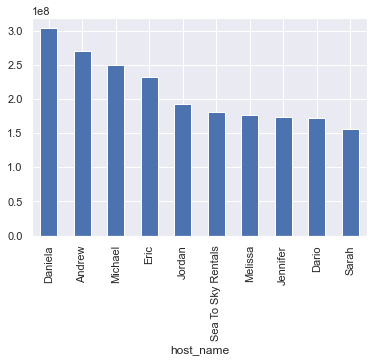

In [27]:
listing_host.plot(kind = 'bar')

## what are the localities of top ten hosts?

In [28]:
n=10
listing_host_locality = listing.groupby(['host_name', 'neighbourhood_cleansed']).sum()['listing_id'].sort_values(ascending = False).head(n)

In [29]:
listing_host_locality

host_name           neighbourhood_cleansed   
Eric                Broadway                     164534632
Jordan              Belltown                     111245347
Melissa             University District          108059127
Daniela             Belltown                      98985508
Dario               University District           91022060
Sea To Sky Rentals  Belltown                      89212133
Daniela             Central Business District     80948838
Ren                 University District           78969406
Mack & Sophia       Belltown                      75315788
Andrew              Wallingford                   70357957
Name: listing_id, dtype: int64

# who are super_host?

In [30]:
#super host %
print(pd.DataFrame(listing.groupby('host_is_superhost')['host_id'].size()/listing.shape[0]*100))


                     host_id
host_is_superhost           
f                  79.570456
t                  20.377161


## create a new data frame 'listing_subset' 16 features selected:
It will contain a subset of features from the original df 'listing'. We will drop columns with missing values.
other criterion of selection: 1. reduntat looking columns for location such as longitude/latitude/street/neighbourhood/city are represented by 'neighbourhood_cleansed'
2. features describing host are representd by host_id and host_name
3. features containing urls will be dropped

In [32]:
listing_subset = listing[['listing_id', 'host_id','host_name','host_listings_count','host_total_listings_count','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','price','minimum_nights','maximum_nights',
                          'number_of_reviews','price']]

In [32]:
listing_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_id                 3818 non-null   int64  
 1   host_id                    3818 non-null   int64  
 2   host_name                  3816 non-null   object 
 3   host_listings_count        3816 non-null   float64
 4   host_total_listings_count  3816 non-null   float64
 5   neighbourhood_cleansed     3818 non-null   object 
 6   property_type              3817 non-null   object 
 7   room_type                  3818 non-null   object 
 8   accommodates               3818 non-null   int64  
 9   bathrooms                  3802 non-null   float64
 10  bedrooms                   3812 non-null   float64
 11  price                      3818 non-null   float64
 12  minimum_nights             3818 non-null   int64  
 13  maximum_nights             3818 non-null   int64

In [33]:
listing_subset.describe()

,listing_id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,price
count,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,1.578556e+07,7.157757,7.157757,3.349398,1.259469,1.307712,127.976166,2.369303,780.447617,22.223415,127.976166
std,2.962660e+06,1.458382e+07,28.628149,28.628149,1.977599,0.590369,0.883395,90.250022,16.305902,1683.589007,37.730892,90.250022
min,3.335000e+03,4.193000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,1.000000,1.000000,0.000000,20.000000
25%,3.258256e+06,3.275204e+06,1.000000,1.000000,2.000000,1.000000,1.000000,75.000000,1.000000,60.000000,2.000000,75.000000
50%,6.118244e+06,1.055814e+07,1.000000,1.000000,3.000000,1.000000,1.000000,100.000000,2.000000,1125.000000,9.000000,100.000000
75%,8.035127e+06,2.590309e+07,3.000000,3.000000,4.000000,1.000000,2.000000,150.000000,2.000000,1125.000000,26.000000,150.000000
max,1.034016e+07,5.320861e+07,502.000000,502.000000,16.000000,8.000000,7.000000,1000.000000,1000.000000,100000.000000,474.000000,1000.000000


In [34]:
# find correlation between numeric feature:
corr_matrix = listing_subset.corr()

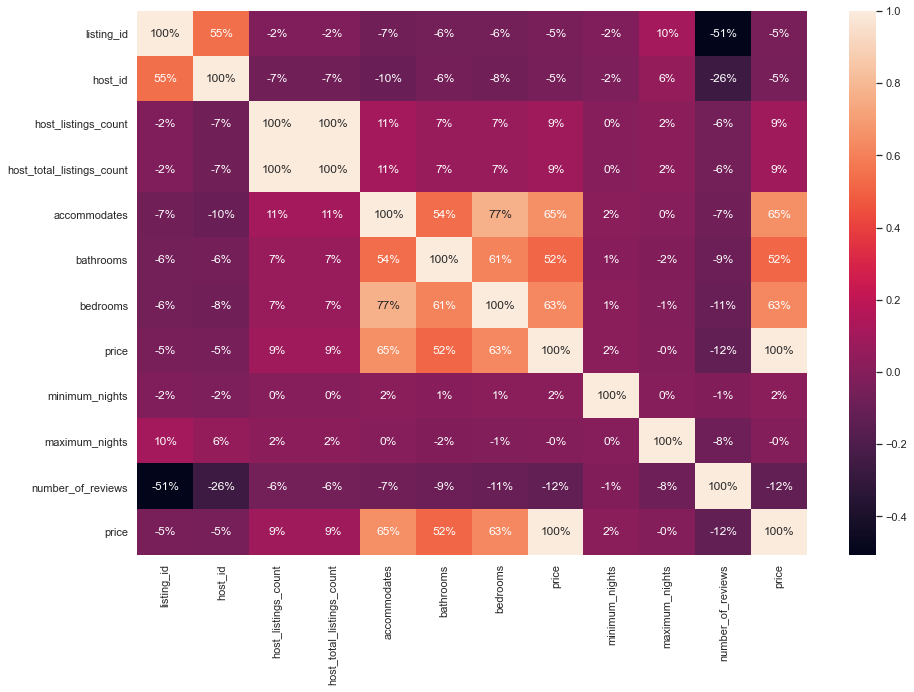

In [100]:

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".0%")
plt.show()

## Review DF- get some insight
--- top reviwers
--- most reviwed listing
-- reviews for top ten listing

In [35]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [36]:
print('Number of unique listings in reviews dataset:{}'.format(len(reviews['listing_id'].unique())))

Number of unique listings in reviews dataset:3191


In [37]:
print('Number of reviews {}'.format(reviews.shape[0]))


Number of reviews 84849


In [38]:
#datetime conversion 
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [39]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [40]:
# Number of missing data in comments field (review dataset)--- only 18 comments missing in reviews dataset
print(reviews['comments'].isna().sum())


18


# lets take a look at our top reviewers?

In [41]:
top_reviewers = reviews.groupby(['reviewer_name']).sum()['listing_id'].head(n)
n =10

In [42]:
top_reviewers

reviewer_name
'Brielle            254340
(Leo) Dennis       4417792
(email hidden)    72096267
5012scf            1593991
A                  3917617
A M                9138923
A'Ala              7967844
A-Rod                53867
A. Anastasia        934123
A. Heather         1005823
Name: listing_id, dtype: int64

# Merge 'reviews' df with the 'listing_subset' df 

In [43]:
# merge reviews and listing df:
rev_listing = pd.merge(reviews, listing_subset, on='listing_id')


In [44]:
rev_listing.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_id,host_name,host_listings_count,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,price
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,37686877,Kelly,1.0,1.0,Lower Queen Anne,Apartment,Private room,2,1.0,1.0,75.0,2,15,16,75.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,37686877,Kelly,1.0,1.0,Lower Queen Anne,Apartment,Private room,2,1.0,1.0,75.0,2,15,16,75.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",37686877,Kelly,1.0,1.0,Lower Queen Anne,Apartment,Private room,2,1.0,1.0,75.0,2,15,16,75.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,37686877,Kelly,1.0,1.0,Lower Queen Anne,Apartment,Private room,2,1.0,1.0,75.0,2,15,16,75.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,37686877,Kelly,1.0,1.0,Lower Queen Anne,Apartment,Private room,2,1.0,1.0,75.0,2,15,16,75.0


In [45]:
rev_listing.shape

(84849, 21)

In [46]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    df_new- imputed dataframe
    
    This function cleans df using the following steps:
    1. Select the numeric variables in the dataset
    2. Imputes the mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all the columns that are not the Price column
    6. Create y as the Price column

    '''
  
    num_vars= df.select_dtypes(include=['int','float']).values()

   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)

   
    cat_vars = df.select_dtypes(include=['object']).values()

   
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    return df

In [49]:
new_df = clean_data(rev_listing)

TypeError: 'numpy.ndarray' object is not callable

In [48]:
new_df.head(5)

NameError: name 'new_df' is not defined

In [ ]:
#@title Best months for rental?

plt.figure(figsize=(15, 5))

# # bookings by month
plotdata = pd_reviews[['date']].groupby(pd_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = pd_bookings[['date','estimated_revenue']].groupby(pd_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()


# Calender dataset- get some insight

In [55]:
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [56]:
#how many unique listings in calendar:
unique_listing_calender = calender['listing_id'].unique()
print('Number of unique listings in calendar dataset:{}'.format(len(unique_listing_calender)))

Number of unique listings in calendar dataset:3818


In [58]:
calender.info

<bound method DataFrame.info of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>